In [592]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
#from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.applications import VGG16

import os

import numpy as np
np.random.seed(1)
import random
random.seed(2)
tf.random.set_seed(3)


import matplotlib.pyplot as plt

In [593]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [621]:
base = 'cats_and_dogs'

In [622]:
train_images = os.path.join(base, 'train')
validation_images = os.path.join(base, 'validation')

In [623]:
train_images_cats = os.path.join(train_images, 'cats')
train_images_dogs = os.path.join(train_images, 'dogs')
validation_images_cats = os.path.join(validation_images, 'cats')
validation_images_dogs = os.path.join(validation_images, 'dogs')

In [624]:
num_cats_tr = len(os.listdir(train_images_cats))
num_dogs_tr = len(os.listdir(train_images_dogs))
num_cats_val = len(os.listdir(validation_images_cats))
num_dogs_val = len(os.listdir(validation_images_dogs))

In [625]:
total_train = num_cats_tr + num_dogs_tr
total_validation = num_cats_val + num_dogs_val

In [599]:
BATCH_SIZE = 64
IMG_SHAPE = 150

In [600]:
#feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
#pretrained_model_without_top_layer = hub.KerasLayer(feature_extractor_model,
#                                                    input_shape=(IMG_SHAPE,IMG_SHAPE,3),
#                                                    trainable=False)

In [601]:
#conv_base = VGG16(weights='imagenet', include_top=False,
#                  input_shape=(IMG_SHAPE,IMG_SHAPE,3))
#conv_base.trainable = False

In [602]:
conv_base = keras.applications.Xception(weights='imagenet', include_top=False,
                  input_shape=(IMG_SHAPE,IMG_SHAPE,3))
conv_base.trainable = False

In [603]:
train_images_generator = ImageDataGenerator(rescale=1./255, #rescalar
                                            rotation_range=40, #rotacionar imagem
                                            width_shift_range=0.2,
                                            height_shift_range=0.2,
                                            shear_range=0.2, #cisalhamento
                                            zoom_range=0.2, #zoom
                                            horizontal_flip=True, #inverter horizontalmente
                                            fill_mode='nearest')


validation_images_generator = ImageDataGenerator(rescale=1./255)


In [604]:
train_data_gen = train_images_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                            directory=train_images,
                                                            shuffle=True,
                                                            target_size=(IMG_SHAPE,IMG_SHAPE),
                                                            class_mode='binary'
                                                           )

validation_data_gen = validation_images_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                            directory=validation_images,
                                                            shuffle=False,
                                                            target_size=(IMG_SHAPE,IMG_SHAPE),
                                                            class_mode='binary'
                                                           )

Found 25000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [605]:
train_data_gen.class_indices

{'cats': 0, 'dogs': 1}

In [606]:
validation_data_gen.class_indices

{'cats': 0, 'dogs': 1}

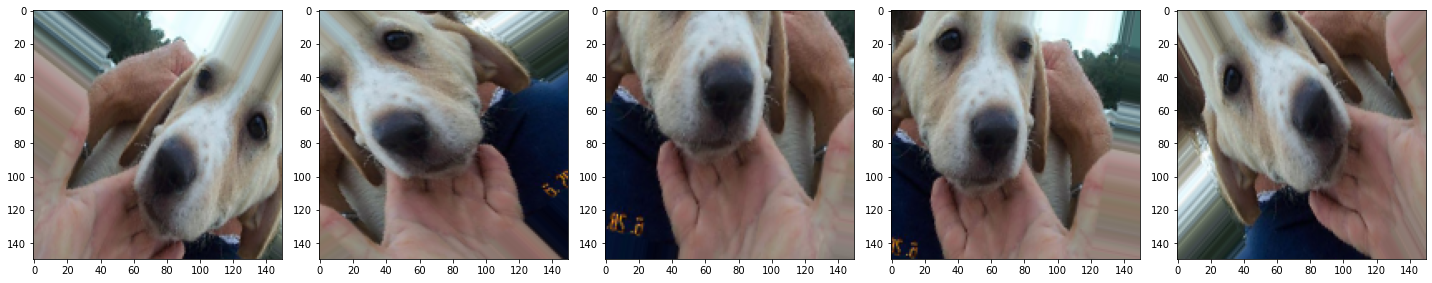

In [607]:
images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(images)

In [608]:
my_init = keras.initializers.glorot_uniform(seed = 1)
model = keras.models.Sequential([
    conv_base,
    
    keras.layers.GlobalAveragePooling2D(),
    
    keras.layers.Flatten(),

    keras.layers.Dense(1024, activation='relu', kernel_initializer = my_init),

    keras.layers.Dense(2, activation='softmax', kernel_initializer = my_init)
                         
])

In [609]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [610]:
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 5, 5, 2048)        20861480  
_________________________________________________________________
global_average_pooling2d_22  (None, 2048)              0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_43 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_44 (Dense)             (None, 2)                 2050      
Total params: 22,961,706
Trainable params: 2,100,226
Non-trainable params: 20,861,480
_________________________________________________________________


In [611]:
EPOCHS = 2

In [612]:
history = model.fit_generator(train_data_gen, 
                              steps_per_epoch = int(np.ceil(total_train / float(BATCH_SIZE))),
                              epochs=EPOCHS,
                              validation_data=validation_data_gen, 
                              validation_steps = int(np.ceil(total_validation / float(BATCH_SIZE))),
                              )

Epoch 1/2
139/391 [=========>....................] - ETA: 7:52 - loss: 0.2482 - accuracy: 0.9096

C:\Users\951548759\Anaconda3\envs\tf\lib\site-packages\PIL\TiffImagePlugin.py:793: UserWarning: Truncated File Read
  warnings.warn(str(msg))


191/391 [=============>................] - ETA: 6:16 - loss: 0.2225 - accuracy: 0.9169

UnknownError:  UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x000000F60463FBD0>
Traceback (most recent call last):

  File "C:\Users\951548759\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\ops\script_ops.py", line 244, in __call__
    ret = func(*args)

  File "C:\Users\951548759\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 302, in wrapper
    return func(*args, **kwargs)

  File "C:\Users\951548759\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 827, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "C:\Users\951548759\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\data_adapter.py", line 814, in wrapped_generator
    for data in generator_fn():

  File "C:\Users\951548759\Anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\engine\data_adapter.py", line 940, in generator_fn
    yield x[i]

  File "C:\Users\951548759\Anaconda3\envs\tf\lib\site-packages\keras_preprocessing\image\iterator.py", line 65, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "C:\Users\951548759\Anaconda3\envs\tf\lib\site-packages\keras_preprocessing\image\iterator.py", line 227, in _get_batches_of_transformed_samples
    img = load_img(filepaths[j],

  File "C:\Users\951548759\Anaconda3\envs\tf\lib\site-packages\keras_preprocessing\image\utils.py", line 114, in load_img
    img = pil_image.open(io.BytesIO(f.read()))

  File "C:\Users\951548759\Anaconda3\envs\tf\lib\site-packages\PIL\Image.py", line 2967, in open
    raise UnidentifiedImageError(

PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x000000F60463FBD0>


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_223703]

Function call stack:
train_function


In [ ]:
model.save("cats_and_dogs_modelTL.h5")

In [ ]:
# analysis
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [ ]:
epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#fazer predições
test_images = os.path.join(base, 'test')
test_dogs_images = os.path.join(test_images, 'dogs')
test_cats_images = os.path.join(test_images, 'cats')

In [ ]:
test_images_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
test_data_gen = test_images_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                            directory=test_images,
                                                            shuffle=False,
                                                            target_size=(IMG_SHAPE,IMG_SHAPE),
                                                            class_mode='binary'
                                                           )

In [ ]:
images = [test_data_gen[0][0][0] for i in range(5)]
plotImages(images)

In [ ]:
prediction_probabilities = model.predict_generator(test_data_gen, verbose=1)


In [ ]:
contGatos = 0
contCacho = 0
for i in range(0,len(prediction_probabilities)):
    if i < 1000:
        if np.argmax(prediction_probabilities[i]) == 0:
            contGatos += 1
    else:
        if np.argmax(prediction_probabilities[i]) == 1:
            contCacho += 1

In [ ]:
print('Gatos:',(contGatos/1000)*100,'%')
print('Cachorros:',(contCacho/1000)*100,'%')

In [ ]:
#dogs
print("Dogs:")
patch_image = os.path.join("DogsTestes", "pacco.jpeg")
test_data_gen = image.load_img(patch_image, target_size=(IMG_SHAPE,IMG_SHAPE))
img_array = image.img_to_array(test_data_gen)/255
img_batch = np.expand_dims(img_array, axis=0)
prediction = model.predict(img_batch)
print(np.argmax(prediction))
patch_image = os.path.join("DogsTestes", "frida.jpeg")
test_data_gen = image.load_img(patch_image, target_size=(IMG_SHAPE,IMG_SHAPE))
img_array = image.img_to_array(test_data_gen)/255
img_batch = np.expand_dims(img_array, axis=0)
prediction = model.predict(img_batch)
print(np.argmax(prediction))
patch_image = os.path.join("DogsTestes", "teddy.jpeg")
test_data_gen = image.load_img(patch_image, target_size=(IMG_SHAPE,IMG_SHAPE))
img_array = image.img_to_array(test_data_gen)/255
img_batch = np.expand_dims(img_array, axis=0)
prediction = model.predict(img_batch)
print(np.argmax(prediction))

#cats
print("Cats:")
patch_image = os.path.join("CatsTestes", "gato1.jpg")
test_data_gen = image.load_img(patch_image, target_size=(IMG_SHAPE,IMG_SHAPE))
img_array = image.img_to_array(test_data_gen)/255
img_batch = np.expand_dims(img_array, axis=0)
prediction = model.predict(img_batch)
print(np.argmax(prediction))
patch_image = os.path.join("CatsTestes", "gato2.jpg")
test_data_gen = image.load_img(patch_image, target_size=(IMG_SHAPE,IMG_SHAPE))
img_array = image.img_to_array(test_data_gen)/255
img_batch = np.expand_dims(img_array, axis=0)
prediction = model.predict(img_batch)
print(np.argmax(prediction))
patch_image = os.path.join("CatsTestes", "gato3.jpg")
test_data_gen = image.load_img(patch_image, target_size=(IMG_SHAPE,IMG_SHAPE))
img_array = image.img_to_array(test_data_gen)/255
img_batch = np.expand_dims(img_array, axis=0)
prediction = model.predict(img_batch)
print(np.argmax(prediction))
print(prediction)


In [ ]:
#os.listdir(test_images)

In [627]:
for i in os.listdir(train_images_cats):
    patch_image = os.path.join(train_images_cats, i)
    print(i)
    test_data_gen = image.load_img(patch_image, target_size=(IMG_SHAPE,IMG_SHAPE))

0.jpg
1.jpg
10.jpg
100.jpg
1000.jpg
10000.jpg
10001.jpg
10002.jpg
10003.jpg
10004.jpg
10005.jpg
10006.jpg
10007.jpg
10008.jpg
10009.jpg
1001.jpg
10010.jpg
10011.jpg
10012.jpg
10013.jpg
10014.jpg
10015.jpg
10016.jpg
10017.jpg
10018.jpg
10019.jpg
1002.jpg
10020.jpg
10021.jpg
10022.jpg
10023.jpg
10024.jpg
10025.jpg
10026.jpg
10027.jpg
10028.jpg
10029.jpg
1003.jpg
10030.jpg
10031.jpg
10032.jpg
10033.jpg
10034.jpg
10035.jpg
10036.jpg
10037.jpg
10038.jpg
10039.jpg
1004.jpg
10040.jpg
10041.jpg
10042.jpg
10043.jpg
10044.jpg
10045.jpg
10046.jpg
10047.jpg
10048.jpg
10049.jpg
1005.jpg
10050.jpg
10051.jpg
10052.jpg
10053.jpg
10054.jpg
10055.jpg
10056.jpg
10057.jpg
10058.jpg
10059.jpg
1006.jpg
10060.jpg
10061.jpg
10062.jpg
10063.jpg
10064.jpg
10065.jpg
10066.jpg
10067.jpg
10068.jpg
10069.jpg
1007.jpg
10070.jpg
10071.jpg
10072.jpg
10073.jpg
10074.jpg
10075.jpg
10076.jpg
10077.jpg
10078.jpg
10079.jpg
1008.jpg
10080.jpg
10081.jpg
10082.jpg
10083.jpg
10084.jpg
10085.jpg
10086.jpg
10087.jpg
10088.jpg
10

10780.jpg
10781.jpg
10782.jpg
10783.jpg
10784.jpg
10785.jpg
10786.jpg
10787.jpg
10788.jpg
10789.jpg
1079.jpg
10790.jpg
10791.jpg
10792.jpg
10793.jpg
10794.jpg
10795.jpg
10796.jpg
10797.jpg
10798.jpg
10799.jpg
108.jpg
1080.jpg
10800.jpg
10801.jpg
10802.jpg
10803.jpg
10804.jpg
10805.jpg
10806.jpg
10807.jpg
10808.jpg
10809.jpg
1081.jpg
10810.jpg
10811.jpg
10812.jpg
10813.jpg
10814.jpg
10815.jpg
10816.jpg
10817.jpg
10818.jpg
10819.jpg
1082.jpg
10820.jpg
10821.jpg
10822.jpg
10823.jpg
10824.jpg
10825.jpg
10826.jpg
10827.jpg
10828.jpg
10829.jpg
1083.jpg
10830.jpg
10831.jpg
10832.jpg
10833.jpg
10834.jpg
10835.jpg
10836.jpg
10837.jpg
10838.jpg
10839.jpg
1084.jpg
10840.jpg
10841.jpg
10842.jpg
10843.jpg
10844.jpg
10845.jpg
10846.jpg
10847.jpg
10848.jpg
10849.jpg
1085.jpg
10850.jpg
10851.jpg
10852.jpg
10853.jpg
10854.jpg
10855.jpg
10856.jpg
10857.jpg
10858.jpg
10859.jpg
1086.jpg
10860.jpg
10861.jpg
10862.jpg
10863.jpg
10864.jpg
10865.jpg
10866.jpg
10867.jpg
10868.jpg
10869.jpg
1087.jpg
10870.jpg
1

11582.jpg
11583.jpg
11584.jpg
11585.jpg
11586.jpg
11587.jpg
11588.jpg
11589.jpg
1159.jpg
11590.jpg
11591.jpg
11592.jpg
11593.jpg
11594.jpg
11595.jpg
11596.jpg
11597.jpg
11598.jpg
11599.jpg
116.jpg
1160.jpg
11600.jpg
11601.jpg
11602.jpg
11603.jpg
11604.jpg
11605.jpg
11606.jpg
11607.jpg
11608.jpg
11609.jpg
1161.jpg
11610.jpg
11611.jpg
11612.jpg
11613.jpg
11614.jpg
11615.jpg
11616.jpg
11617.jpg
11618.jpg
11619.jpg
1162.jpg
11620.jpg
11621.jpg
11622.jpg
11623.jpg
11624.jpg
11625.jpg
11626.jpg
11627.jpg
11628.jpg
11629.jpg
1163.jpg
11630.jpg
11631.jpg
11632.jpg
11633.jpg
11634.jpg
11635.jpg
11636.jpg
11637.jpg
11638.jpg
11639.jpg
1164.jpg
11640.jpg
11641.jpg
11642.jpg
11643.jpg
11644.jpg
11645.jpg
11646.jpg
11647.jpg
11648.jpg
11649.jpg
1165.jpg
11650.jpg
11651.jpg
11652.jpg
11653.jpg
11654.jpg
11655.jpg
11656.jpg
11657.jpg
11658.jpg
11659.jpg
1166.jpg
11660.jpg
11661.jpg
11662.jpg
11663.jpg
11664.jpg
11665.jpg
11666.jpg
11667.jpg
11668.jpg
11669.jpg
1167.jpg
11670.jpg
11671.jpg
11672.jpg
1

12336.jpg
12337.jpg
12338.jpg
12339.jpg
1234.jpg
12340.jpg
12341.jpg
12342.jpg
12343.jpg
12344.jpg
12345.jpg
12346.jpg
12347.jpg
12348.jpg
12349.jpg
1235.jpg
12350.jpg
12351.jpg
12352.jpg
12353.jpg
12354.jpg
12355.jpg
12356.jpg
12357.jpg
12358.jpg
12359.jpg
1236.jpg
12360.jpg
12361.jpg
12362.jpg
12363.jpg
12364.jpg
12365.jpg
12366.jpg
12367.jpg
12368.jpg
12369.jpg
1237.jpg
12370.jpg
12371.jpg
12372.jpg
12373.jpg
12374.jpg
12375.jpg
12376.jpg
12377.jpg
12378.jpg
12379.jpg
1238.jpg
12380.jpg
12381.jpg
12382.jpg
12383.jpg
12384.jpg
12385.jpg
12386.jpg
12387.jpg
12388.jpg
12389.jpg
1239.jpg
12390.jpg
12391.jpg
12392.jpg
12393.jpg
12394.jpg
12395.jpg
12396.jpg
12397.jpg
12398.jpg
12399.jpg
124.jpg
1240.jpg
12400.jpg
12401.jpg
12402.jpg
12403.jpg
12404.jpg
12405.jpg
12406.jpg
12407.jpg
12408.jpg
12409.jpg
1241.jpg
12410.jpg
12411.jpg
12412.jpg
12413.jpg
12414.jpg
12415.jpg
12416.jpg
12417.jpg
12418.jpg
12419.jpg
1242.jpg
12420.jpg
12421.jpg
12422.jpg
12423.jpg
12424.jpg
12425.jpg
12426.jpg
1

1933.jpg
1934.jpg
1935.jpg
1936.jpg
1937.jpg
1938.jpg
1939.jpg
194.jpg
1940.jpg
1941.jpg
1942.jpg
1943.jpg
1944.jpg
1945.jpg
1946.jpg
1947.jpg
1948.jpg
1949.jpg
195.jpg
1950.jpg
1951.jpg
1952.jpg
1953.jpg
1954.jpg
1955.jpg
1956.jpg
1957.jpg
1958.jpg
1959.jpg
196.jpg
1960.jpg
1961.jpg
1962.jpg
1963.jpg
1964.jpg
1965.jpg
1966.jpg
1967.jpg
1968.jpg
1969.jpg
197.jpg
1970.jpg
1971.jpg
1972.jpg
1973.jpg
1974.jpg
1975.jpg
1976.jpg
1977.jpg
1978.jpg
1979.jpg
198.jpg
1980.jpg
1981.jpg
1982.jpg
1983.jpg
1984.jpg
1985.jpg
1986.jpg
1987.jpg
1988.jpg
1989.jpg
199.jpg
1990.jpg
1991.jpg
1992.jpg
1993.jpg
1994.jpg
1995.jpg
1996.jpg
1997.jpg
1998.jpg
1999.jpg
2.jpg
20.jpg
200.jpg
2000.jpg
2001.jpg
2002.jpg
2003.jpg
2004.jpg
2005.jpg
2006.jpg
2007.jpg
2008.jpg
2009.jpg
201.jpg
2010.jpg
2011.jpg
2012.jpg
2013.jpg
2014.jpg
2015.jpg
2016.jpg
2017.jpg
2018.jpg
2019.jpg
202.jpg
2020.jpg
2021.jpg
2022.jpg
2023.jpg
2024.jpg
2025.jpg
2026.jpg
2027.jpg
2028.jpg
2029.jpg
203.jpg
2030.jpg
2031.jpg
2032.jpg
2033.jp

280.jpg
2800.jpg
2801.jpg
2802.jpg
2803.jpg
2804.jpg
2805.jpg
2806.jpg
2807.jpg
2808.jpg
2809.jpg
281.jpg
2810.jpg
2811.jpg
2812.jpg
2813.jpg
2814.jpg
2815.jpg
2816.jpg
2817.jpg
2818.jpg
2819.jpg
282.jpg
2820.jpg
2821.jpg
2822.jpg
2823.jpg
2824.jpg
2825.jpg
2826.jpg
2827.jpg
2828.jpg
2829.jpg
283.jpg
2830.jpg
2831.jpg
2832.jpg
2833.jpg
2834.jpg
2835.jpg
2836.jpg
2837.jpg
2838.jpg
2839.jpg
284.jpg
2840.jpg
2841.jpg
2842.jpg
2843.jpg
2844.jpg
2845.jpg
2846.jpg
2847.jpg
2848.jpg
2849.jpg
285.jpg
2850.jpg
2851.jpg
2852.jpg
2853.jpg
2854.jpg
2855.jpg
2856.jpg
2857.jpg
2858.jpg
2859.jpg
286.jpg
2860.jpg
2861.jpg
2862.jpg
2863.jpg
2864.jpg
2865.jpg
2866.jpg
2867.jpg
2868.jpg
2869.jpg
287.jpg
2870.jpg
2871.jpg
2872.jpg
2873.jpg
2874.jpg
2875.jpg
2876.jpg
2877.jpg
2878.jpg
2879.jpg
288.jpg
2880.jpg
2881.jpg
2882.jpg
2883.jpg
2884.jpg
2885.jpg
2886.jpg
2887.jpg
2888.jpg
2889.jpg
289.jpg
2890.jpg
2891.jpg
2892.jpg
2893.jpg
2894.jpg
2895.jpg
2896.jpg
2897.jpg
2898.jpg
2899.jpg
29.jpg
290.jpg
2900.

3687.jpg
3688.jpg
3689.jpg
369.jpg
3690.jpg
3691.jpg
3692.jpg
3693.jpg
3694.jpg
3695.jpg
3696.jpg
3697.jpg
3698.jpg
3699.jpg
37.jpg
370.jpg
3700.jpg
3701.jpg
3702.jpg
3703.jpg
3704.jpg
3705.jpg
3706.jpg
3707.jpg
3708.jpg
3709.jpg
371.jpg
3710.jpg
3711.jpg
3712.jpg
3713.jpg
3714.jpg
3715.jpg
3716.jpg
3717.jpg
3718.jpg
3719.jpg
372.jpg
3720.jpg
3721.jpg
3722.jpg
3723.jpg
3724.jpg
3725.jpg
3726.jpg
3727.jpg
3728.jpg
3729.jpg
373.jpg
3730.jpg
3731.jpg
3732.jpg
3733.jpg
3734.jpg
3735.jpg
3736.jpg
3737.jpg
3738.jpg
3739.jpg
374.jpg
3740.jpg
3741.jpg
3742.jpg
3743.jpg
3744.jpg
3745.jpg
3746.jpg
3747.jpg
3748.jpg
3749.jpg
375.jpg
3750.jpg
3751.jpg
3752.jpg
3753.jpg
3754.jpg
3755.jpg
3756.jpg
3757.jpg
3758.jpg
3759.jpg
376.jpg
3760.jpg
3761.jpg
3762.jpg
3763.jpg
3764.jpg
3765.jpg
3766.jpg
3767.jpg
3768.jpg
3769.jpg
377.jpg
3770.jpg
3771.jpg
3772.jpg
3773.jpg
3774.jpg
3775.jpg
3776.jpg
3777.jpg
3778.jpg
3779.jpg
378.jpg
3780.jpg
3781.jpg
3782.jpg
3783.jpg
3784.jpg
3785.jpg
3786.jpg
3787.jpg
3788

4576.jpg
4577.jpg
4578.jpg
4579.jpg
458.jpg
4580.jpg
4581.jpg
4582.jpg
4583.jpg
4584.jpg
4585.jpg
4586.jpg
4587.jpg
4588.jpg
4589.jpg
459.jpg
4590.jpg
4591.jpg
4592.jpg
4593.jpg
4594.jpg
4595.jpg
4596.jpg
4597.jpg
4598.jpg
4599.jpg
46.jpg
460.jpg
4600.jpg
4601.jpg
4602.jpg
4603.jpg
4604.jpg
4605.jpg
4606.jpg
4607.jpg
4608.jpg
4609.jpg
461.jpg
4610.jpg
4611.jpg
4612.jpg
4613.jpg
4614.jpg
4615.jpg
4616.jpg
4617.jpg
4618.jpg
4619.jpg
462.jpg
4620.jpg
4621.jpg
4622.jpg
4623.jpg
4624.jpg
4625.jpg
4626.jpg
4627.jpg
4628.jpg
4629.jpg
463.jpg
4630.jpg
4631.jpg
4632.jpg
4633.jpg
4634.jpg
4635.jpg
4636.jpg
4637.jpg
4638.jpg
4639.jpg
464.jpg
4640.jpg
4641.jpg
4642.jpg
4643.jpg
4644.jpg
4645.jpg
4646.jpg
4647.jpg
4648.jpg
4649.jpg
465.jpg
4650.jpg
4651.jpg
4652.jpg
4653.jpg
4654.jpg
4655.jpg
4656.jpg
4657.jpg
4658.jpg
4659.jpg
466.jpg
4660.jpg
4661.jpg
4662.jpg
4663.jpg
4664.jpg
4665.jpg
4666.jpg
4667.jpg
4668.jpg
4669.jpg
467.jpg
4670.jpg
4671.jpg
4672.jpg
4673.jpg
4674.jpg
4675.jpg
4676.jpg
4677

5471.jpg
5472.jpg
5473.jpg
5474.jpg
5475.jpg
5476.jpg
5477.jpg
5478.jpg
5479.jpg
548.jpg
5480.jpg
5481.jpg
5482.jpg
5483.jpg
5484.jpg
5485.jpg
5486.jpg
5487.jpg
5488.jpg
5489.jpg
549.jpg
5490.jpg
5491.jpg
5492.jpg
5493.jpg
5494.jpg
5495.jpg
5496.jpg
5497.jpg
5498.jpg
5499.jpg
55.jpg
550.jpg
5500.jpg
5501.jpg
5502.jpg
5503.jpg
5504.jpg
5505.jpg
5506.jpg
5507.jpg
5508.jpg
5509.jpg
551.jpg
5510.jpg
5511.jpg
5512.jpg
5513.jpg
5514.jpg
5515.jpg
5516.jpg
5517.jpg
5518.jpg
5519.jpg
552.jpg
5520.jpg
5521.jpg
5522.jpg
5523.jpg
5524.jpg
5525.jpg
5526.jpg
5527.jpg
5528.jpg
5529.jpg
553.jpg
5530.jpg
5531.jpg
5532.jpg
5533.jpg
5534.jpg
5535.jpg
5536.jpg
5537.jpg
5538.jpg
5539.jpg
554.jpg
5540.jpg
5541.jpg
5542.jpg
5543.jpg
5544.jpg
5545.jpg
5546.jpg
5547.jpg
5548.jpg
5549.jpg
555.jpg
5550.jpg
5551.jpg
5552.jpg
5553.jpg
5554.jpg
5555.jpg
5556.jpg
5557.jpg
5558.jpg
5559.jpg
556.jpg
5560.jpg
5561.jpg
5562.jpg
5563.jpg
5564.jpg
5565.jpg
5566.jpg
5567.jpg
5568.jpg
5569.jpg
557.jpg
5570.jpg
5571.jpg
5572

6334.jpg
6335.jpg
6336.jpg
6337.jpg
6338.jpg
6339.jpg
634.jpg
6340.jpg
6341.jpg
6342.jpg
6343.jpg
6344.jpg
6345.jpg
6346.jpg
6347.jpg
6348.jpg
6349.jpg
635.jpg
6350.jpg
6351.jpg
6352.jpg
6353.jpg
6354.jpg
6355.jpg
6356.jpg
6357.jpg
6358.jpg
6359.jpg
636.jpg
6360.jpg
6361.jpg
6362.jpg
6363.jpg
6364.jpg
6365.jpg
6366.jpg
6367.jpg
6368.jpg
6369.jpg
637.jpg
6370.jpg
6371.jpg
6372.jpg
6373.jpg
6374.jpg
6375.jpg
6376.jpg
6377.jpg
6378.jpg
6379.jpg
638.jpg
6380.jpg
6381.jpg
6382.jpg
6383.jpg
6384.jpg
6385.jpg
6386.jpg
6387.jpg
6388.jpg
6389.jpg
639.jpg
6390.jpg
6391.jpg
6392.jpg
6393.jpg
6394.jpg
6395.jpg
6396.jpg
6397.jpg
6398.jpg
6399.jpg
64.jpg
640.jpg
6400.jpg
6401.jpg
6402.jpg
6403.jpg
6404.jpg
6405.jpg
6406.jpg
6407.jpg
6408.jpg
6409.jpg
641.jpg
6410.jpg
6411.jpg
6412.jpg
6413.jpg
6414.jpg
6415.jpg
6416.jpg
6417.jpg
6418.jpg
6419.jpg
642.jpg
6420.jpg
6421.jpg
6422.jpg
6423.jpg
6424.jpg
6425.jpg
6426.jpg
6427.jpg
6428.jpg
6429.jpg
643.jpg
6430.jpg
6431.jpg
6432.jpg
6433.jpg
6434.jpg
6435

719.jpg
7190.jpg
7191.jpg
7192.jpg
7193.jpg
7194.jpg
7195.jpg
7196.jpg
7197.jpg
7198.jpg
7199.jpg
72.jpg
720.jpg
7200.jpg
7201.jpg
7202.jpg
7203.jpg
7204.jpg
7205.jpg
7206.jpg
7207.jpg
7208.jpg
7209.jpg
721.jpg
7210.jpg
7211.jpg
7212.jpg
7213.jpg
7214.jpg
7215.jpg
7216.jpg
7217.jpg
7218.jpg
7219.jpg
722.jpg
7220.jpg
7221.jpg
7222.jpg
7223.jpg
7224.jpg
7225.jpg
7226.jpg
7227.jpg
7228.jpg
7229.jpg
723.jpg
7230.jpg
7231.jpg
7232.jpg
7233.jpg
7234.jpg
7235.jpg
7236.jpg
7237.jpg
7238.jpg
7239.jpg
724.jpg
7240.jpg
7241.jpg
7242.jpg
7243.jpg
7244.jpg
7245.jpg
7246.jpg
7247.jpg
7248.jpg
7249.jpg
725.jpg
7250.jpg
7251.jpg
7252.jpg
7253.jpg
7254.jpg
7255.jpg
7256.jpg
7257.jpg
7258.jpg
7259.jpg
726.jpg
7260.jpg
7261.jpg
7262.jpg
7263.jpg
7264.jpg
7265.jpg
7266.jpg
7267.jpg
7268.jpg
7269.jpg
727.jpg
7270.jpg
7271.jpg
7272.jpg
7273.jpg
7274.jpg
7275.jpg
7276.jpg
7277.jpg
7278.jpg
7279.jpg
728.jpg
7280.jpg
7281.jpg
7282.jpg
7283.jpg
7284.jpg
7285.jpg
7286.jpg
7287.jpg
7288.jpg
7289.jpg
729.jpg
7290.

807.jpg
8070.jpg
8071.jpg
8072.jpg
8073.jpg
8074.jpg
8075.jpg
8076.jpg
8077.jpg
8078.jpg
8079.jpg
808.jpg
8080.jpg
8081.jpg
8082.jpg
8083.jpg
8084.jpg
8085.jpg
8086.jpg
8087.jpg
8088.jpg
8089.jpg
809.jpg
8090.jpg
8091.jpg
8092.jpg
8093.jpg
8094.jpg
8095.jpg
8096.jpg
8097.jpg
8098.jpg
8099.jpg
81.jpg
810.jpg
8100.jpg
8101.jpg
8102.jpg
8103.jpg
8104.jpg
8105.jpg
8106.jpg
8107.jpg
8108.jpg
8109.jpg
811.jpg
8110.jpg
8111.jpg
8112.jpg
8113.jpg
8114.jpg
8115.jpg
8116.jpg
8117.jpg
8118.jpg
8119.jpg
812.jpg
8120.jpg
8121.jpg
8122.jpg
8123.jpg
8124.jpg
8125.jpg
8126.jpg
8127.jpg
8128.jpg
8129.jpg
813.jpg
8130.jpg
8131.jpg
8132.jpg
8133.jpg
8134.jpg
8135.jpg
8136.jpg
8137.jpg
8138.jpg
8139.jpg
814.jpg
8140.jpg
8141.jpg
8142.jpg
8143.jpg
8144.jpg
8145.jpg
8146.jpg
8147.jpg
8148.jpg
8149.jpg
815.jpg
8150.jpg
8151.jpg
8152.jpg
8153.jpg
8154.jpg
8155.jpg
8156.jpg
8157.jpg
8158.jpg
8159.jpg
816.jpg
8160.jpg
8161.jpg
8162.jpg
8163.jpg
8164.jpg
8165.jpg
8166.jpg
8167.jpg
8168.jpg
8169.jpg
817.jpg
8170.

8961.jpg
8962.jpg
8963.jpg
8964.jpg
8965.jpg
8966.jpg
8967.jpg
8968.jpg
8969.jpg
897.jpg
8970.jpg
8971.jpg
8972.jpg
8973.jpg
8974.jpg
8975.jpg
8976.jpg
8977.jpg
8978.jpg
8979.jpg
898.jpg
8980.jpg
8981.jpg
8982.jpg
8983.jpg
8984.jpg
8985.jpg
8986.jpg
8987.jpg
8988.jpg
8989.jpg
899.jpg
8990.jpg
8991.jpg
8992.jpg
8993.jpg
8994.jpg
8995.jpg
8996.jpg
8997.jpg
8998.jpg
8999.jpg
9.jpg
90.jpg
900.jpg
9000.jpg
9001.jpg
9002.jpg
9003.jpg
9004.jpg
9005.jpg
9006.jpg
9007.jpg
9008.jpg
9009.jpg
901.jpg
9010.jpg
9011.jpg
9012.jpg
9013.jpg
9014.jpg
9015.jpg
9016.jpg
9017.jpg
9018.jpg
9019.jpg
902.jpg
9020.jpg
9021.jpg
9022.jpg
9023.jpg
9024.jpg
9025.jpg
9026.jpg
9027.jpg
9028.jpg
9029.jpg
903.jpg
9030.jpg
9031.jpg
9032.jpg
9033.jpg
9034.jpg
9035.jpg
9036.jpg
9037.jpg
9038.jpg
9039.jpg
904.jpg
9040.jpg
9041.jpg
9042.jpg
9043.jpg
9044.jpg
9045.jpg
9046.jpg
9047.jpg
9048.jpg
9049.jpg
905.jpg
9050.jpg
9051.jpg
9052.jpg
9053.jpg
9054.jpg
9055.jpg
9056.jpg
9057.jpg
9058.jpg
9059.jpg
906.jpg
9060.jpg
9061.jp

9796.jpg
9797.jpg
9798.jpg
9799.jpg
98.jpg
980.jpg
9800.jpg
9801.jpg
9802.jpg
9803.jpg
9804.jpg
9805.jpg
9806.jpg
9807.jpg
9808.jpg
9809.jpg
981.jpg
9810.jpg
9811.jpg
9812.jpg
9813.jpg
9814.jpg
9815.jpg
9816.jpg
9817.jpg
9818.jpg
9819.jpg
982.jpg
9820.jpg
9821.jpg
9822.jpg
9823.jpg
9824.jpg
9825.jpg
9826.jpg
9827.jpg
9828.jpg
9829.jpg
983.jpg
9830.jpg
9831.jpg
9832.jpg
9833.jpg
9834.jpg
9835.jpg
9836.jpg
9837.jpg
9838.jpg
9839.jpg
984.jpg
9840.jpg
9841.jpg
9842.jpg
9843.jpg
9844.jpg
9845.jpg
9846.jpg
9847.jpg
9848.jpg
9849.jpg
985.jpg
9850.jpg
9851.jpg
9852.jpg
9853.jpg
9854.jpg
9855.jpg
9856.jpg
9857.jpg
9858.jpg
9859.jpg
986.jpg
9860.jpg
9861.jpg
9862.jpg
9863.jpg
9864.jpg
9865.jpg
9866.jpg
9867.jpg
9868.jpg
9869.jpg
987.jpg
9870.jpg
9871.jpg
9872.jpg
9873.jpg
9874.jpg
9875.jpg
9876.jpg
9877.jpg
9878.jpg
9879.jpg
988.jpg
9880.jpg
9881.jpg
9882.jpg
9883.jpg
9884.jpg
9885.jpg
9886.jpg
9887.jpg
9888.jpg
9889.jpg
989.jpg
9890.jpg
9891.jpg
9892.jpg
9893.jpg
9894.jpg
9895.jpg
9896.jpg
9897

In [ ]:
#contCorretos = 0
#for i in os.listdir(test_dogs_images):
#    patch_image = os.path.join(test_dogs_images, i)
 #   test_data_gen = image.load_img(patch_image, target_size=(IMG_SHAPE,IMG_SHAPE))
    
  #  img_array = image.img_to_array(test_data_gen)/255
   # img_batch = np.expand_dims(img_array, axis=0)
    
    #img_preprocessed = preprocess_input(img_batch)
    
    #prediction = model.predict(img_batch)
    #print(np.argmax(prediction[0]))
    #print(prediction)
    
   # if np.argmax(prediction[0]) == 1:
    #    contCorretos += 1

In [ ]:
#prediction[0].dtype

In [ ]:
#acertos = contCorretos/len(os.listdir(test_dogs_images))
#print("Taxa de acerto dos dogs:", acertos)

In [ ]:
#len(os.listdir(test_dogs_images))

In [ ]:
#contCorretosCats = 0
#for i in os.listdir(test_cats_images):
#    patch_image = os.path.join(test_cats_images, i)
 #   test_data_gen = image.load_img(patch_image, target_size=(IMG_SHAPE,IMG_SHAPE))
    
  #  img_array = image.img_to_array(test_data_gen)/255
   # img_batch = np.expand_dims(img_array, axis=0)
    
    #img_preprocessed = preprocess_input(img_batch)
    
    #prediction = model.predict(img_batch)
    #print(np.argmax(prediction[0]))
    #print(prediction)
    #if np.argmax(prediction[0]) == 0:
     #   contCorretosCats += 1

In [ ]:
#acertosCats = contCorretosCats/len(os.listdir(test_cats_images))
#print("Taxa de acerto dos cats:", acertosCats)

In [ ]:
#np.argmax(prediction[0])

In [ ]:
#print("Taxa de acertos total:", (contCorretosCats+contCorretos)/(len(os.listdir(test_cats_images))+len(os.listdir(test_dogs_images))))